In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import pandas as pd
from scipy import interpolate
import seaborn as sns

In [4]:
Monkey9=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\9x145-97-CD4-DeplCMV-seronegativePrimaryInfecflow.csv')
Monkey10=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\10x396-09-CD4-DeplCMV-seronegativePrimaryInfecflow.csv')
Monkey11=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\11x174-97-CD4-DeplCMV-seronegativePrimaryInfecflow.csv')
Monkey12=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\12x274-98-CD4-DeplCMV-seronegativePrimaryInfecflow.csv')
Monkey13=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\13GM04-CD4-DeplCMV-seronegativePrimaryInfecflow.csv')
Monkey14=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\14HD79-CD4-DeplCMV-seronegativePrimaryInfecflow.csv')

In [5]:
Animal_data=pd.read_csv(r'C:\Users\elyon\Documents\school\CMV\Placental-Transmission-main\animal_data_cleared.csv')

In [6]:
monkey9=Animal_data[Animal_data.columns[[0,9]]].dropna()
monkey10=Animal_data[Animal_data.columns[[0,10]]].dropna()
monkey11=Animal_data[Animal_data.columns[[0,11]]].dropna()
monkey12=Animal_data[Animal_data.columns[[0,12]]].dropna()
monkey13=Animal_data[Animal_data.columns[[0,13]]].dropna()
monkey14=Animal_data[Animal_data.columns[[0,14]]].dropna()

In [7]:
def pchip_interpolate(monkey18,num):
    if max(monkey18[monkey18.columns[0]].values)< 100:
        df2= {monkey18.columns[0]: max(166,max(monkey18[monkey18.columns[0]].values)+5 ), monkey18.columns[1]: 0}
        monkey18 = monkey18.append(df2, ignore_index = True)
        
    xn=np.linspace(start = min(min(monkey18[monkey18.columns[0]].values),0),
               stop = max(166, max(monkey18[monkey18.columns[0]].values)),
               num = num)
    yn = interpolate.pchip_interpolate(monkey18[monkey18.columns[0]].values, monkey18[monkey18.columns[1]].values, xn)
    return [xn,yn]

In [8]:
def days_difference(monkey18,Monkey18):
    peak18_1=monkey18.iloc[:,0].values[list(monkey18.iloc[:,1].values).index(max(monkey18.iloc[:,1].values))]
    peak18_2=Monkey18.iloc[:,0].values[list(Monkey18.iloc[:,1].values).index(max(Monkey18.iloc[:,1].values))]
    return [peak18_1,peak18_2]

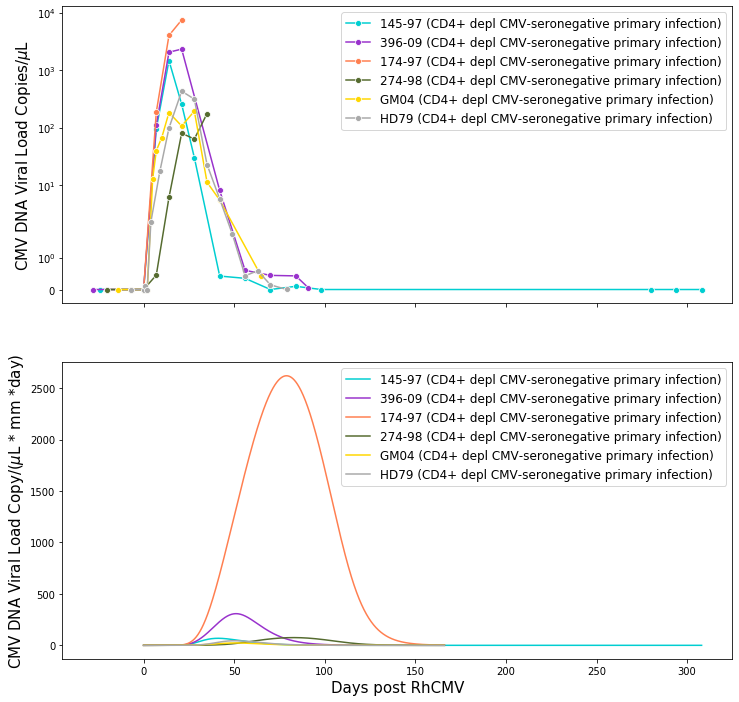

In [9]:
fig,axes=plt.subplots(2,1,sharex='col',figsize=(12,12))
sns.lineplot(data=monkey9, x= monkey9.columns[0], y=monkey9.columns[1],ax=axes[0],color='darkturquoise',marker='o',label=monkey9.columns[1])
sns.lineplot(data=monkey10, x= monkey10.columns[0], y=monkey10.columns[1],ax=axes[0],color='darkorchid',marker='o',label=monkey10.columns[1])
sns.lineplot(data=monkey11, x= monkey11.columns[0], y=monkey11.columns[1],ax=axes[0],color='coral',marker='o',label=monkey11.columns[1])
sns.lineplot(data=monkey12, x= monkey12.columns[0], y=monkey12.columns[1],ax=axes[0],color='darkolivegreen',marker='o',label=monkey12.columns[1])
sns.lineplot(data=monkey13, x= monkey13.columns[0], y=monkey13.columns[1],ax=axes[0],color='gold',marker='o',label=monkey13.columns[1])
sns.lineplot(data=monkey14, x= monkey14.columns[0], y=monkey14.columns[1],ax=axes[0],color='darkgray',marker='o',label=monkey14.columns[1])
#[xn9,yn9]=pchip_interpolate(monkey9,200)
#[xn10,yn10]=pchip_interpolate(monkey10,200)
#[xn11,yn11]=pchip_interpolate(monkey11,200)
#[xn12,yn12]=pchip_interpolate(monkey12,200)
#[xn13,yn13]=pchip_interpolate(monkey13,200)
#[xn14,yn14]=pchip_interpolate(monkey14,200)
#axes[0].plot(xn9,yn9,'--',color='b')
#axes[0].plot(xn10,yn10,'--',color='r')
#axes[0].plot(xn11,yn11,'--',color='g')
#axes[0].plot(xn12,yn12,'--',color='b')
##axes[0].plot(xn13,yn13,'--',color='r')
#axes[0].plot(xn14,yn14,'--',color='g')
axes[0].legend(loc=1,fontsize=12)
axes[0].set_yscale('symlog')


axes[0].set_ylabel('CMV DNA Viral Load Copies/$\mu$L',fontsize=15)

sns.lineplot(data=Monkey9,x=Monkey9.columns[0],y=Monkey9.columns[1],ax=axes[1],color='darkturquoise',label=monkey9.columns[1])
sns.lineplot(data=Monkey10,x=Monkey10.columns[0],y=Monkey10.columns[1],ax=axes[1],color='darkorchid',label=monkey10.columns[1])
sns.lineplot(data=Monkey11,x=Monkey11.columns[0],y=Monkey11.columns[1],ax=axes[1],color='coral',label=monkey11.columns[1])
sns.lineplot(data=Monkey12,x=Monkey12.columns[0],y=Monkey12.columns[1],ax=axes[1],color='darkolivegreen',label=monkey12.columns[1])
sns.lineplot(data=Monkey13,x=Monkey13.columns[0],y=Monkey13.columns[1],ax=axes[1],color='gold',label=monkey13.columns[1])
sns.lineplot(data=Monkey14,x=Monkey14.columns[0],y=Monkey14.columns[1],ax=axes[1],color='darkgray',label=monkey14.columns[1])


axes[1].set_ylabel('CMV DNA Viral Load Copy/($\mu$L * mm *day)',fontsize=15)
axes[1].legend(loc=1,fontsize=12)
axes[1].set_xlabel('Days post RhCMV',fontsize=15)
#axes[1].set_yscale('symlog')
plt.savefig('CD4 depl seronegative Primary Infection1.png')

In [10]:
def flow_figure(monkey18,Monkey18,num,label,color):
    fig,axes=plt.subplots(2,1,sharex='col',figsize=(12,12))
    sns.scatterplot(data=monkey18, x= monkey18.columns[0], y=monkey18.columns[1],ax=axes[0],color=color,marker='o',label=label)

    [xn18,yn18]=pchip_interpolate(monkey18,num)
    axes[0].plot(xn18,yn18,color=color)

    axes[0].legend(loc=1,fontsize=13)



    axes[0].set_ylabel('CMV DNA Viral Load Copies/$\mu$L',fontsize=15)

    sns.lineplot(data=Monkey18,x=Monkey18.columns[0],y=Monkey18.columns[1],ax=axes[1],color=color,label=label)


    axes[1].set_ylabel('CMV DNA Viral Load Copy/($\mu$L * mm *day)',fontsize=15)
    axes[1].legend(loc=1,fontsize=13)
    axes[1].set_xlabel('Days post RhCMV',fontsize=15)

    


    [peak18_1,peak18_2]=days_difference(monkey18,Monkey18)
    axes[0].axvline(x=peak18_1,color=color,linestyle='--')
    axes[1].axvline(x=peak18_2,color=color,linestyle='--')
    plt.title('Days between two peaks: '+"{:.2f}".format(peak18_2-peak18_1),fontsize=15)
    plt.savefig('label.png')

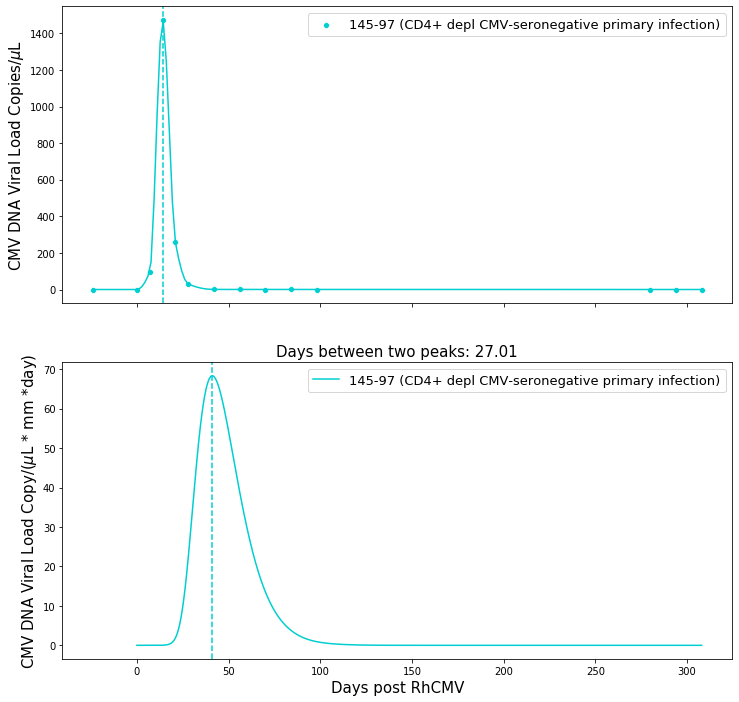

In [11]:
flow_figure(monkey9,Monkey9,200,monkey9.columns[1],'darkturquoise')

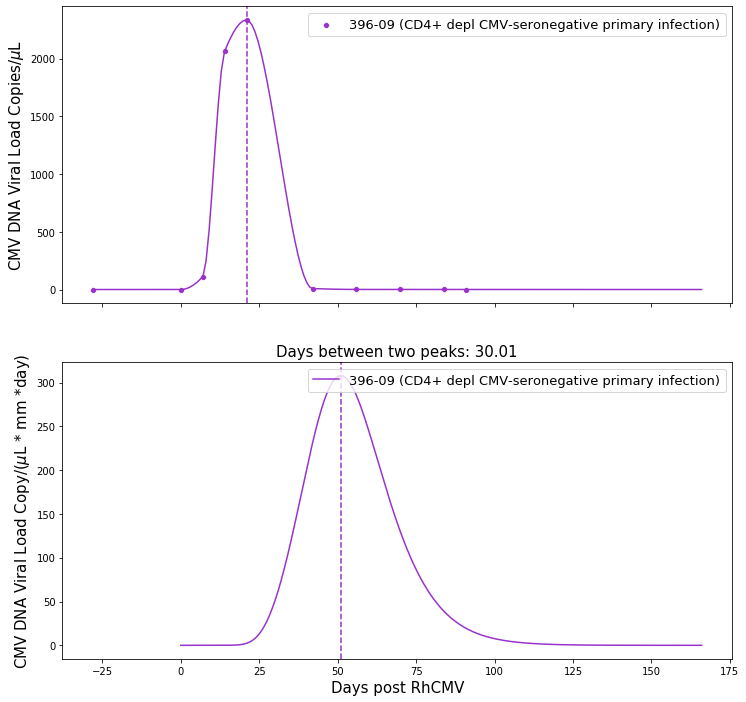

In [12]:
flow_figure(monkey10,Monkey10,200,monkey10.columns[1],'darkorchid')

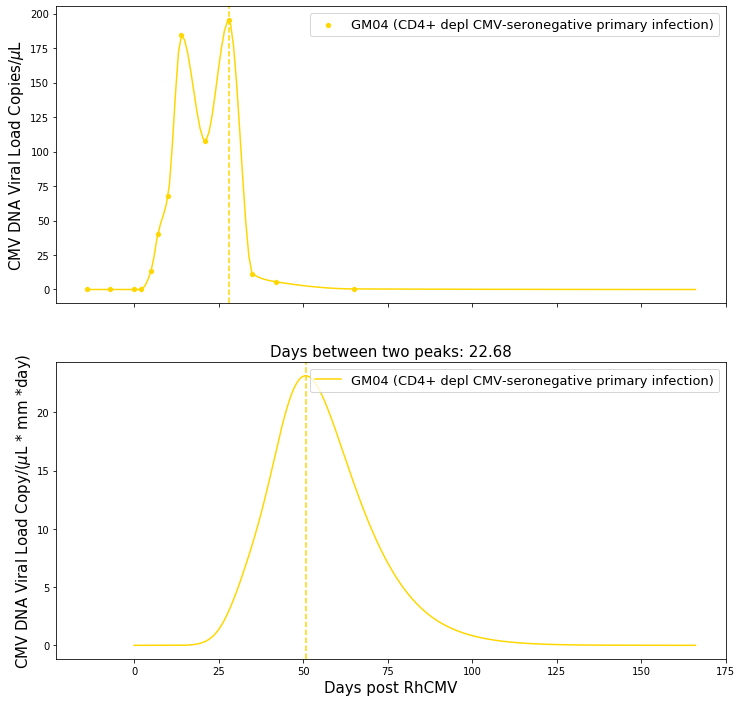

In [13]:
flow_figure(monkey13,Monkey13,200,monkey13.columns[1],'gold')

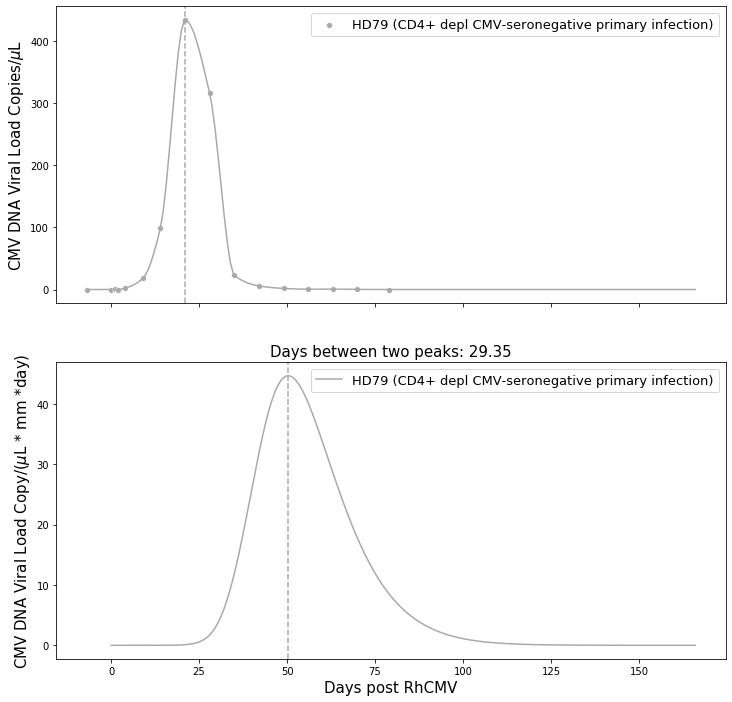

In [14]:
flow_figure(monkey14,Monkey14,200,monkey14.columns[1],'darkgray')